In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
  number1: int
  operation : str
  number2 : int
  final : int

def adder(state:AgentState) -> AgentState:
  """This adds the two input numbers"""
  state['final'] = state['number1'] + state['number2']
  return state

def subtractor(state:AgentState) -> AgentState:
  """This subtracts number 2 from number 1"""
  state['final'] = state['number1'] - state['number2']
  return state

def decide_next_node(state:AgentState) -> AgentState:
  """This nodes helps us to decide the next node"""
  if state['operation'] == '+':
    return 'addtion_operation'
  elif state['operation'] == '-':
    return 'subtraction_operation'

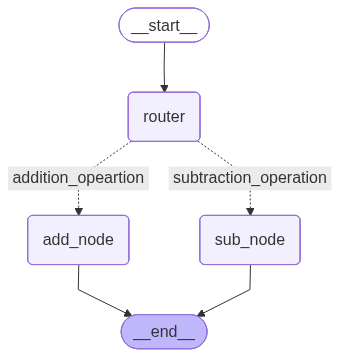

In [3]:
graph = StateGraph(AgentState)

graph.add_node('add_node', adder)
graph.add_node('sub_node', subtractor)
graph.add_node('router', lambda state : state)

graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router',
    decide_next_node,
    {
        #Edge : Node
        'addition_opeartion':'add_node',
        'subtraction_operation':'sub_node'
    }
)

graph.add_edge('add_node', END)
graph.add_edge('sub_node', END)

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [4]:
initial_state_1 = AgentState(number1=10, operation='-', number2=5)
result = app.invoke(initial_state_1)

In [5]:
result

{'number1': 10, 'operation': '-', 'number2': 5, 'final': 5}

#### Exercise

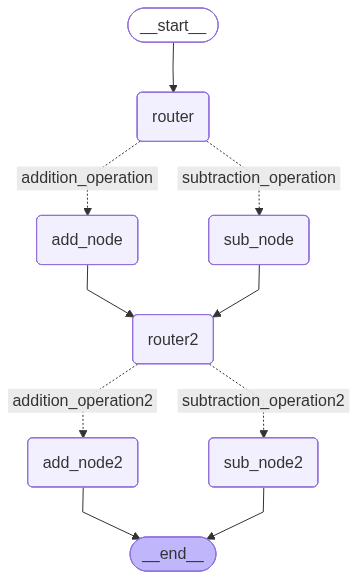

In [6]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
  number1 : int
  operation : str
  number2 : int
  number3 : int
  number4 : int
  operation2 : str
  finalnum : int
  finalnum2 : int

def adder(state: AgentState) -> AgentState:
  """This node performs addition operation"""
  state['finalnum'] = state['number1'] + state['number2']
  return state

def subtractor(state: AgentState) -> AgentState:
  """This node performs subtraction operation"""
  state['finalnum'] = state['number1'] - state['number2']
  return state

def decide_next_node(state: AgentState) -> AgentState:
  """This node is used to decide the next node which returns the edge"""
  if state['operation'] =='+':
    return 'addition_operation'
  elif state['operation'] == '-':
    return 'subtraction_operation'

def adder2(state: AgentState) -> AgentState:
  """This node performs addition operation"""
  state['finalnum2'] = state['number3'] + state['number4']
  return state

def subtractor2(state: AgentState) -> AgentState:
  """This node performs subtraction operation"""
  state['finalnum2'] = state['number3'] - state['number4']
  return state

def decide_next_node2(state: AgentState) -> AgentState:
  """This node is used to decide the next node which returns the edge"""
  if state['operation'] =='+':
    return 'addition_operation2'
  elif state['operation'] == '-':
    return 'subtraction_operation2'

graph = StateGraph(AgentState)

graph.add_node('add_node', adder)
graph.add_node('sub_node', subtractor)
graph.add_node('router', lambda state:state)

graph.add_node('add_node2', adder2)
graph.add_node('sub_node2', subtractor2)
graph.add_node('router2', lambda state:state)

graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router',
    decide_next_node,
    {
        'addition_operation' : 'add_node',
        'subtraction_operation' : 'sub_node'
    }
)

graph.add_edge('add_node', 'router2')
graph.add_edge('sub_node', 'router2')

graph.add_conditional_edges(
    'router2',
    decide_next_node2,
    {
        'addition_operation2' : 'add_node2',
        'subtraction_operation2' : 'sub_node2'
    }
)

graph.add_edge('add_node2', END)
graph.add_edge('sub_node2', END)

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state_1 = AgentState(number1=10, operation='-', number2=5, number3=7, number4=2, operation2='+')
result = app.invoke(initial_state_1)

In [8]:
result

{'number1': 10,
 'operation': '-',
 'number2': 5,
 'number3': 7,
 'number4': 2,
 'operation2': '+',
 'finalnum': 5,
 'finalnum2': 5}